# <span style="color:darkblue"> QTM 151 - Quiz 5 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your Emory ID below

In [2]:
# Write your answer here
print('2554090')

2554090


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


**By printing the message, you acknowledge that you will abide by Emory's code of conduct.**


In [3]:
# Write your answer here:
print("I will abide by Emory's code of conduct.")

I will abide by Emory's code of conduct.


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [4]:
# Write your answer here
import pandas as pd
import matplotlib.pyplot as plt

<font size = "5">

In this quiz you will work with data on exchange rates, <br>
for the following currencies:

- 1 euro (EUR) to dollar (USD)
- 1 pound (GPB) to dollar (USD).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "currencies.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 20.


In [13]:
# Write your own code
currencies_data = pd.read_csv('data_raw/currencies.csv')
currencies_data['date_parsed'] = pd.to_datetime(currencies_data['date_string'], format='%A, %b %d, %Y')

<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "gbp_to_usd" and "eur_to_usd" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 Euro to USD" and "1 GPB to USD"

Hint: See Lecture 21 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


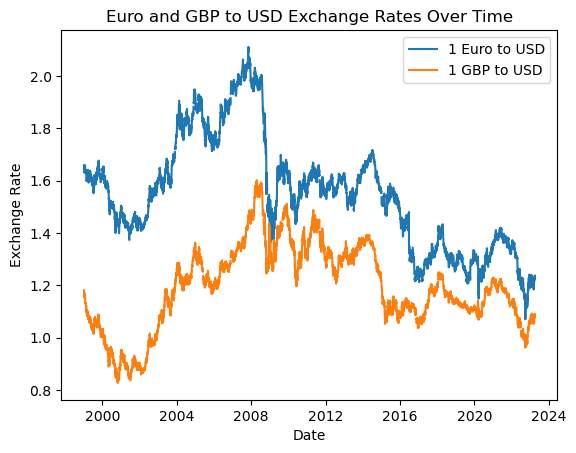

In [32]:
# Write your own code
plt.plot(currencies_data['date_parsed'], currencies_data['eur_to_usd'])
plt.plot(currencies_data['date_parsed'], currencies_data['gbp_to_usd'])
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Euro and GBP to USD Exchange Rates Over Time')
plt.legend(labels=['1 Euro to USD', '1 GBP to USD'])

<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_euro" which computes the percentage daily <br>
growth rate of "eur_to_usd".

Hint: Use ```.diff()``` and ```.shift(1)``` as in Lecture 21

In [16]:
# Write your own code
currencies_data["growth_euro"]=(currencies_data["eur_to_usd"].diff()/currencies_data["eur_to_usd"].shift(1))*100
print(currencies_data)

                  date_string  eur_to_usd  gbp_to_usd date_parsed  growth_euro
0        Monday, Jan 04, 1999      1.6581      1.1812  1999-01-04          NaN
1       Tuesday, Jan 05, 1999      1.6566      1.1760  1999-01-05    -0.090465
2     Wednesday, Jan 06, 1999      1.6547      1.1636  1999-01-06    -0.114693
3      Thursday, Jan 07, 1999      1.6495      1.1672  1999-01-07    -0.314256
4        Friday, Jan 08, 1999      1.6405      1.1554  1999-01-08    -0.545620
...                       ...         ...         ...         ...          ...
6320     Monday, Mar 27, 2023      1.2278      1.0789  2023-03-27     0.433538
6321    Tuesday, Mar 28, 2023      1.2341      1.0844  2023-03-28     0.513113
6322  Wednesday, Mar 29, 2023      1.2313      1.0826  2023-03-29    -0.226886
6323   Thursday, Mar 30, 2023      1.2368      1.0899  2023-03-30     0.446682
6324     Friday, Mar 31, 2023      1.2369      1.0872  2023-03-31     0.008085

[6325 rows x 5 columns]


<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_euro" had a value greater than 2 or less than -2
- Generate a line plot with the "growth_euro" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 21 to create a shaded region <br>
for time periods where "bool_cond" is true.



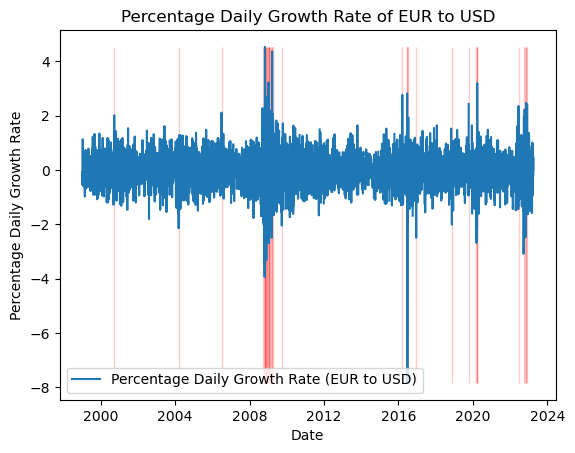

In [38]:
# Write your own code
currencies_data['bool_cond'] = (currencies_data['growth_euro'] > 2) | (currencies_data['growth_euro'] < -2)

plt.plot(currencies_data['date_parsed'], currencies_data['growth_euro'], label='Percentage Daily Growth Rate (EUR to USD)')
vec_y=currencies_data['growth_euro']
plt.fill_between(x= currencies_data['date_parsed'],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = currencies_data['bool_cond'],
                 alpha = 0.2,color = "red")
plt.xlabel('Date')
plt.ylabel('Percentage Daily Growth Rate')
plt.title('Percentage Daily Growth Rate of EUR to USD')
plt.legend()
plt.show()

<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the column "date" and freq to "m" (month)
- Follow the instructions in Lecture 20 to compute an aggregate dataset <br>
by month which computes the standard deviation of "eur_to_usd"
- Display the dataset




In [35]:
# Write your own code
month_config = pd.Grouper(key='date_parsed', freq='m')
monthlydata = (currencies_data
               .groupby(month_config) 
               .agg(eur_to_usd = ("eur_to_usd","std"))
               .reset_index())
print(monthlydata)

    date_parsed  eur_to_usd
0    1999-01-31    0.007345
1    1999-02-28    0.013345
2    1999-03-31    0.010475
3    1999-04-30    0.006172
4    1999-05-31    0.013046
..          ...         ...
286  2022-11-30    0.027308
287  2022-12-31    0.011389
288  2023-01-31    0.015046
289  2023-02-28    0.008972
290  2023-03-31    0.016246

[291 rows x 2 columns]


<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["eur_to_usd","gbp_to_usd"]
```

- Display the dataset

Hint: See Lecture 21 for details on ```pd.melt()```

In [37]:
# Write your own code
financial_long = pd.melt(currencies_data,
                         var_name = "type",
                         value_name = "exchange_rate",
                         id_vars='date_parsed',
                         value_vars=['eur_to_usd','gbp_to_usd'])
financial_long.sort_values(by='date_parsed')

,date_parsed,type,exchange_rate
0,1999-01-04,eur_to_usd,1.6581
6325,1999-01-04,gbp_to_usd,1.1812
1,1999-01-05,eur_to_usd,1.6566
6326,1999-01-05,gbp_to_usd,1.1760
2,1999-01-06,eur_to_usd,1.6547
...,...,...,...
6322,2023-03-29,eur_to_usd,1.2313
12648,2023-03-30,gbp_to_usd,1.0899
6323,2023-03-30,eur_to_usd,1.2368
6324,2023-03-31,eur_to_usd,1.2369
